# Lab | Data Aggregation and Filtering

In this challenge, we will continue to work with customer data from an insurance company. We will use the dataset called marketing_customer_analysis.csv, which can be found at the following link:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv

This dataset contains information such as customer demographics, policy details, vehicle information, and the customer's response to the last marketing campaign. Our goal is to explore and analyze this data by first performing data cleaning, formatting, and structuring.

1. Create a new DataFrame that only includes customers who have a total_claim_amount greater than $1,000 and have a response of "Yes" to the last marketing campaign.

In [6]:
import pandas as pd

# Load dataset
url = "https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv"
marketing_df = pd.read_csv(url)





In [7]:
print(marketing_df.columns)


Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')


In [8]:
marketing_df.columns = marketing_df.columns.str.lower().str.replace(" ", "_")


In [9]:
filtered_df = marketing_df[(marketing_df["total_claim_amount"] > 1000) & (marketing_df["response"] == "Yes")]
print(filtered_df.head())  # Check the first few rows


     unnamed:_0 customer       state  customer_lifetime_value response  \
189         189  OK31456  California             11009.130490      Yes   
236         236  YJ16163      Oregon             11009.130490      Yes   
419         419  GW43195      Oregon             25807.063000      Yes   
442         442  IP94270     Arizona             13736.132500      Yes   
587         587  FJ28407  California              5619.689084      Yes   

     coverage             education effective_to_date employmentstatus gender  \
189   Premium              Bachelor           1/24/11         Employed      F   
236   Premium              Bachelor           1/24/11         Employed      F   
419  Extended               College           2/13/11         Employed      F   
442   Premium                Master           2/13/11         Disabled      F   
587   Premium  High School or Below           1/26/11       Unemployed      M   

     ...  number_of_open_complaints number_of_policies     policy_ty

2. Using the original Dataframe, analyze the average total_claim_amount by each policy type and gender for customers who have responded "Yes" to the last marketing campaign. Write your conclusions.

In [11]:
clv_pivot = marketing_df.pivot_table(
    index="policy_type",
    columns="gender",
    values="total_claim_amount",
    aggfunc="mean"
).round(2)

print(clv_pivot)



gender               F       M
policy_type                   
Corporate Auto  397.80  462.22
Personal Auto   413.24  459.92
Special Auto    458.14  420.36


3. Analyze the total number of customers who have policies in each state, and then filter the results to only include states where there are more than 500 customers.

In [ ]:
# Count the number of customers per state
state_counts = marketing_df["state"].value_counts()

# Filter states with more than 500 customers
filtered_states = state_counts[state_counts > 500]


print(filtered_states)


state
California    3552
Oregon        2909
Arizona       1937
Nevada         993
Washington     888
Name: count, dtype: int64


4. Find the maximum, minimum, and median customer lifetime value by education level and gender. Write your conclusions.



In [ ]:
# Calculate max, min, and median Customer Lifetime Value (CLV) by education level and gender
clv_stats = marketing_df.pivot_table(
    index="education",
    columns="gender",
    values="customer_lifetime_value",
    aggfunc=["max", "min", "median"]
).round(2)


print(clv_stats)

                           max                min            median         
gender                       F         M        F        M        F        M
education                                                                   
Bachelor              73225.96  67907.27  1904.00  1898.01  5640.51  5548.03
College               61850.19  61134.68  1898.68  1918.12  5623.61  6005.85
Doctor                44856.11  32677.34  2395.57  2267.60  5332.46  5577.67
High School or Below  55277.45  83325.38  2144.92  1940.98  6039.55  6286.73
Master                51016.07  50568.26  2417.78  2272.31  5729.86  5579.10


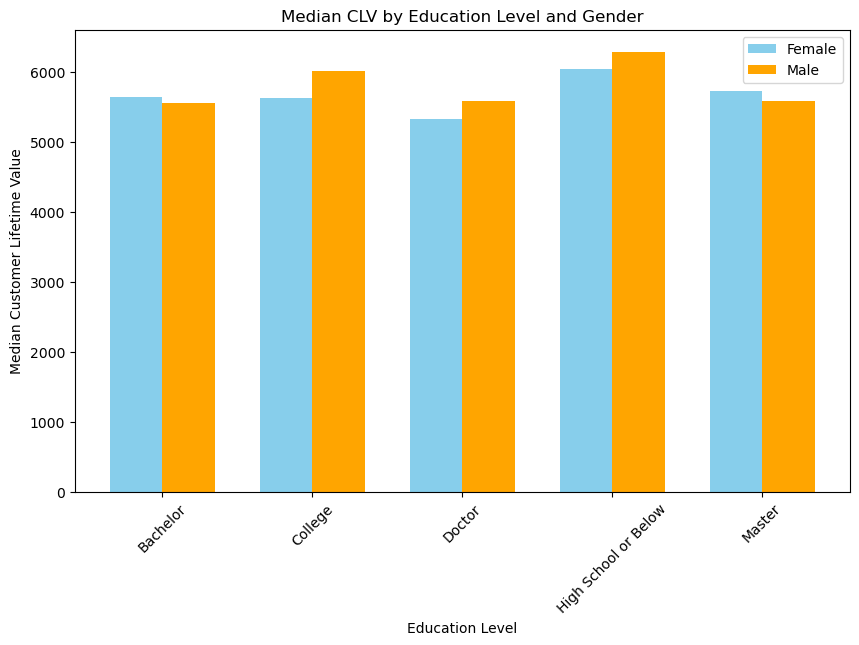

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Define data
education_levels = ["Bachelor", "College", "Doctor", "High School or Below", "Master"]
median_female = [5640.51, 5623.61, 5332.46, 6039.55, 5729.86]
median_male = [5548.03, 6005.85, 5577.67, 6286.73, 5579.10]

# Set positions for bars
x = np.arange(len(education_levels))
bar_width = 0.35

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars
ax.bar(x - bar_width/2, median_female, bar_width, label="Female", color="skyblue")
ax.bar(x + bar_width/2, median_male, bar_width, label="Male", color="orange")

# Labels and title
ax.set_xlabel("Education Level")
ax.set_ylabel("Median Customer Lifetime Value")
ax.set_title("Median CLV by Education Level and Gender")
ax.set_xticks(x)
ax.set_xticklabels(education_levels, rotation=45)
ax.legend()

# Show the chart
plt.show()


In [ ]:
#  INSIGHTS FROM DF:
# High School or Below customers have the highest median CLV, suggesting strong engagement.
# Doctorate holders have the lowest median CLV, indicating lower spending.
# Males generally have higher max CLV, but median values are balanced across genders.
# College graduates (M) have a notably higher median CLV than females, suggesting differences in purchasing behavior.





# Lab | Data Aggregation and Filtering

In this challenge, we will continue to work with customer data from an insurance company. We will use the dataset called marketing_customer_analysis.csv, which can be found at the following link:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv

This dataset contains information such as customer demographics, policy details, vehicle information, and the customer's response to the last marketing campaign. Our goal is to explore and analyze this data by first performing data cleaning, formatting, and structuring.

1. Create a new DataFrame that only includes customers who have a total_claim_amount greater than $1,000 and have a response of "Yes" to the last marketing campaign.

2. Using the original Dataframe, analyze the average total_claim_amount by each policy type and gender for customers who have responded "Yes" to the last marketing campaign. Write your conclusions.

3. Analyze the total number of customers who have policies in each state, and then filter the results to only include states where there are more than 500 customers.

4. Find the maximum, minimum, and median customer lifetime value by education level and gender. Write your conclusions.



## Bonus

5. The marketing team wants to analyze the number of policies sold by state and month. Present the data in a table where the months are arranged as columns and the states are arranged as rows.

6.  Display a new DataFrame that contains the number of policies sold by month, by state, for the top 3 states with the highest number of policies sold.

*Hint:*
- *To accomplish this, you will first need to group the data by state and month, then count the number of policies sold for each group. Afterwards, you will need to sort the data by the count of policies sold in descending order.*
- *Next, you will select the top 3 states with the highest number of policies sold.*
- *Finally, you will create a new DataFrame that contains the number of policies sold by month for each of the top 3 states.*

7. The marketing team wants to analyze the effect of different marketing channels on the customer response rate.

Hint: You can use melt to unpivot the data and create a table that shows the customer response rate (those who responded "Yes") by marketing channel.

External Resources for Data Filtering: https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9

In [ ]:
# your code goes here

## Bonus

5. The marketing team wants to analyze the number of policies sold by state and month. Present the data in a table where the months are arranged as columns and the states are arranged as rows.

6.  Display a new DataFrame that contains the number of policies sold by month, by state, for the top 3 states with the highest number of policies sold.

*Hint:*
- *To accomplish this, you will first need to group the data by state and month, then count the number of policies sold for each group. Afterwards, you will need to sort the data by the count of policies sold in descending order.*
- *Next, you will select the top 3 states with the highest number of policies sold.*
- *Finally, you will create a new DataFrame that contains the number of policies sold by month for each of the top 3 states.*

7. The marketing team wants to analyze the effect of different marketing channels on the customer response rate.

Hint: You can use melt to unpivot the data and create a table that shows the customer response rate (those who responded "Yes") by marketing channel.

External Resources for Data Filtering: https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9

In [ ]:
# your code goes here